The first step is to import all the necessary pacakges

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Now, I will read the sales data csv file to the dataframe sales_df

In [2]:
sales_df = pd.read_csv('/Users/shubhangimallik/Downloads/sales_data.csv')

Checking the dataframe

In [3]:
sales_df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


Using the info function to see if there are null values or not

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Using the describe function to know about mean, median, etc

In [5]:
sales_df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


Using the include=all argument within the describe function to know more about the dataframe

In [6]:
sales_df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Since, there are a lot of null vales(NaN) in the region and Product columns, I will be replacing the null values with the word 'Unknown'. I am not deleting the null values because that will lead to loss of data and will lead to inaccurate analysis

In [51]:
sales_df['Product'].fillna('Unknown', inplace=True)

In [7]:
sales_df['Region'].fillna('Unknown', inplace=True)

There are also a lot of null values in the Price Column so I am using the groupby and transform functions to fill these null values as the average price based on the product category 

In [8]:
sales_df['Price'].fillna(sales_df.groupby('Product')['Price'].transform('mean'), inplace=True)

Similarily, I am filling the null values in Units Sold using groupby and transform functions as the average Units Sold based on the product category

In [9]:
sales_df['Units Sold'].fillna(sales_df.groupby('Product')['Units Sold'].transform('mean'), inplace=True)

Now, all the null values have been filled and I can start plotting graphs to see if there are any outliers or not

Plotting a box plot for the Price column to see if there are any outliers in the Price column

<Axes: >

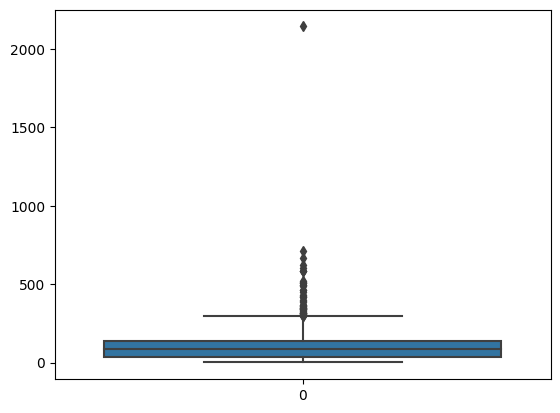

In [10]:
sns.boxplot(sales_df['Price'])

The above graph shows that there is one major outliet where price is more than 2000

Plotting a box plot for Units Sold column to see if there are outliers in this column

<Axes: >

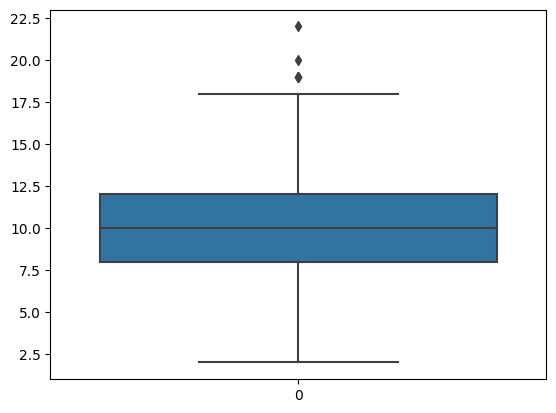

In [11]:
sns.boxplot(sales_df['Units Sold'])

The above graph shows that there are some outliers for Units Sold as well.

Now, I am deleting the outliers in the price column by using the drop function. 

In [12]:
sales_df[sales_df['Price']>2000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [13]:
sales_df.drop(969,axis=0,inplace=True)

I am plotting a box plot again to see if it will be okay to delete the rest of the outliers. This box plot shows a lot of outliers but deleting so many will lead to a significant loss of data which is not advisable

<Axes: >

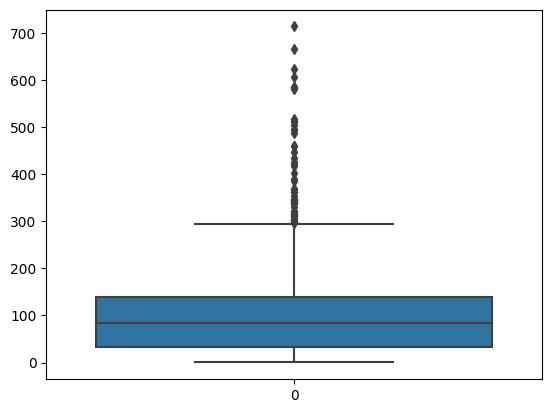

In [14]:
sns.boxplot(sales_df['Price'])

Deleting the outliers in Units Sold column by using the drop function

In [15]:
sales_df[sales_df['Units Sold']>17.5]

,Product,Region,Price,Units Sold,Sale Date
167,Product_28,Region_6,81.148750,18.0,2022-06-17
221,Product_5,Region_5,50.360000,20.0,2022-08-10
232,Product_14,Region_3,104.270000,19.0,2022-08-21
390,Product_41,Region_3,146.960000,18.0,2023-01-26
568,Product_42,Region_1,9.720000,18.0,2023-07-23
678,Product_9,Region_3,79.339286,18.0,2023-11-10
719,Product_50,Region_4,86.730000,22.0,2023-12-21
796,Product_16,Region_2,272.830000,18.0,2024-03-07
912,Product_22,Region_8,116.490000,19.0,2024-07-01
962,Product_13,Region_7,0.610000,19.0,2024-08-20


In [16]:
sales_df.drop(sales_df[sales_df['Units Sold']>17.5].index, axis = 0,inplace=True)


Plotting the box plot for Units Sold now shows zero outliers

<Axes: >

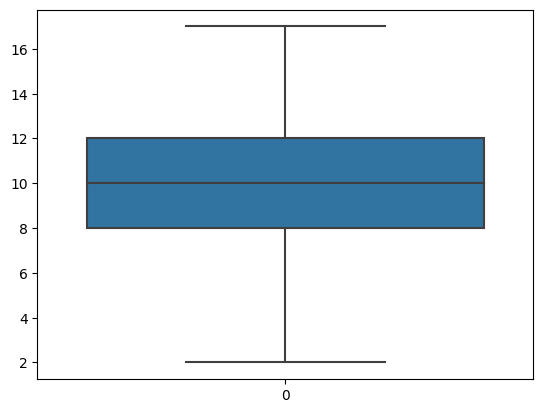

In [17]:
sns.boxplot(sales_df['Units Sold'])

Data Cleaning is now complete. I'm starting the exploratory analysis by plotting an lmplot to see if there is any relation with Units Sold and Price columns

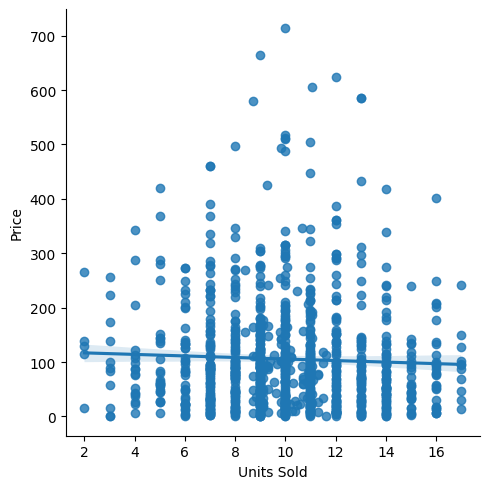

In [18]:
sns.lmplot(data = sales_df, x = 'Units Sold', y = 'Price', fit_reg=True)

The above graph tells us that regardless of the number of units sold(between 2-16), the price stays at an average of just above 100

Plotting a histogram taking the Price column as a parameter

<Axes: xlabel='Price', ylabel='Count'>

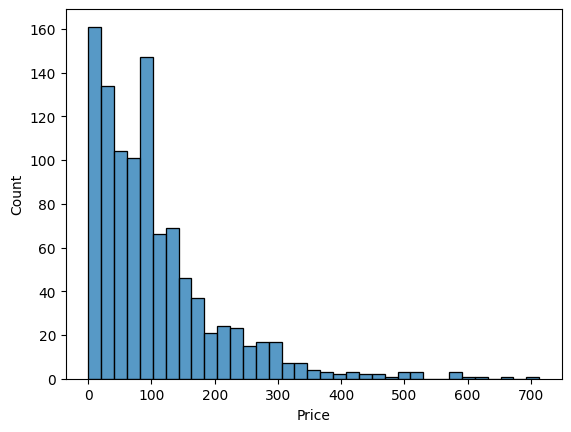

In [19]:
sns.histplot(sales_df['Price'])

The graph above clearly shows that when price is at 100, the count goes up to 140. This means that orders with pricing 100 are occurring more

Plotting a box plot to see if there is any correlation between Units Sold and Region

<Axes: xlabel='Units Sold', ylabel='Region'>

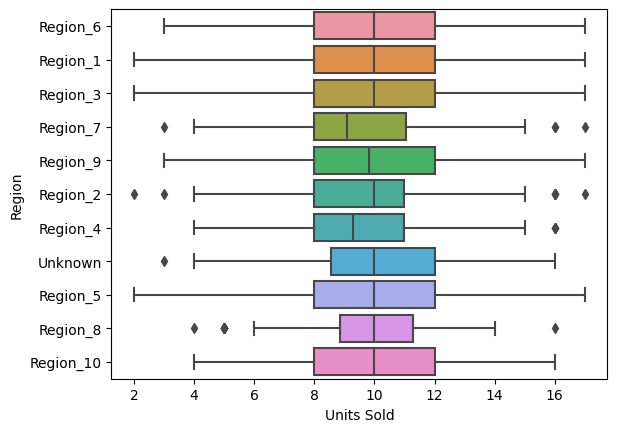

In [20]:
sns.boxplot(x='Units Sold', y='Region', data=sales_df)

The above graph looks pretty evenly distributed. Region_10, Region_5, Region_1, Region_6, Region_3 all look like the average units sold value is between 8-12

I tried plotting a box plot to see if there is a correlation between Product Category and Price but the graph is not easily readable

<Axes: xlabel='Price', ylabel='Product'>

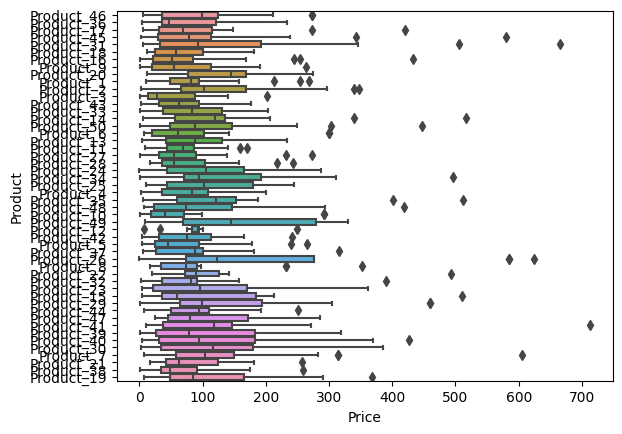

In [21]:
sns.boxplot(x='Price', y='Product', data=sales_df)

Plotting a scatterplot to see a correlation between Price and Units Sold

<Axes: xlabel='Price', ylabel='Units Sold'>

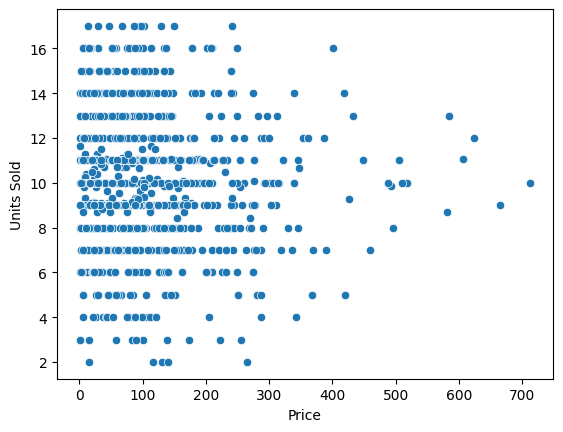

In [22]:
sns.scatterplot(data=sales_df, x='Price', y='Units Sold')

This plot is giving us similar results to the lmplot where we compared price and units sold. It seems like when price is around 100, the plot gets busier therefore suggesting that more orders with the price value 100 is coming in

Next, I have plotted a histogram to see the relation between Region and Units Sold. I have used the tight_layout function for a better view

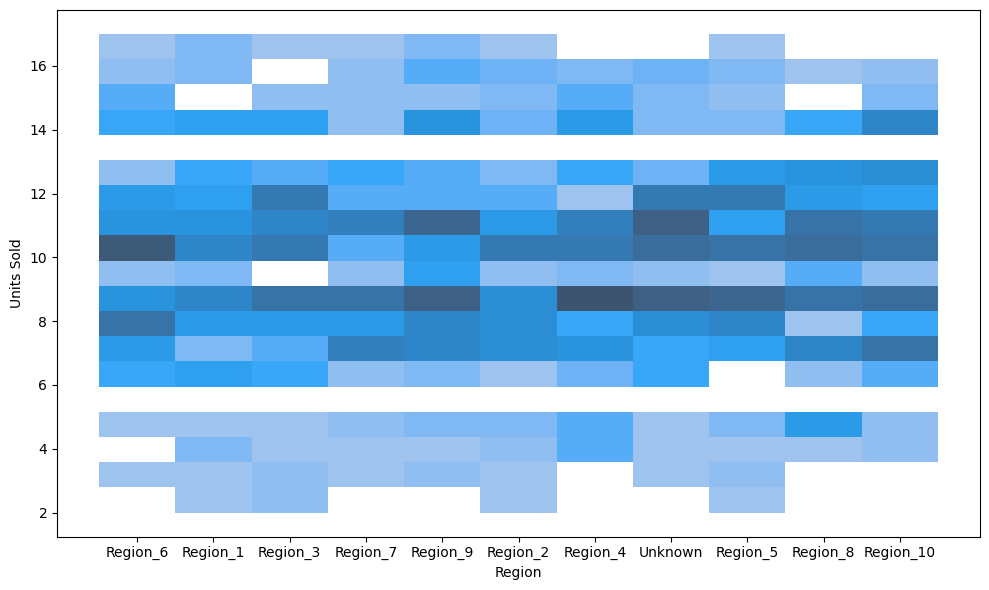

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_df, x='Region', y='Units Sold')
plt.tight_layout()
plt.show()

The graph above shows that 8-12 units are being sold more in all the regions. In most regions orders with units sold between 2-4 or 14-16 is less

Next, I have plotted a histogram to see the relation between Product and Units Sold. 

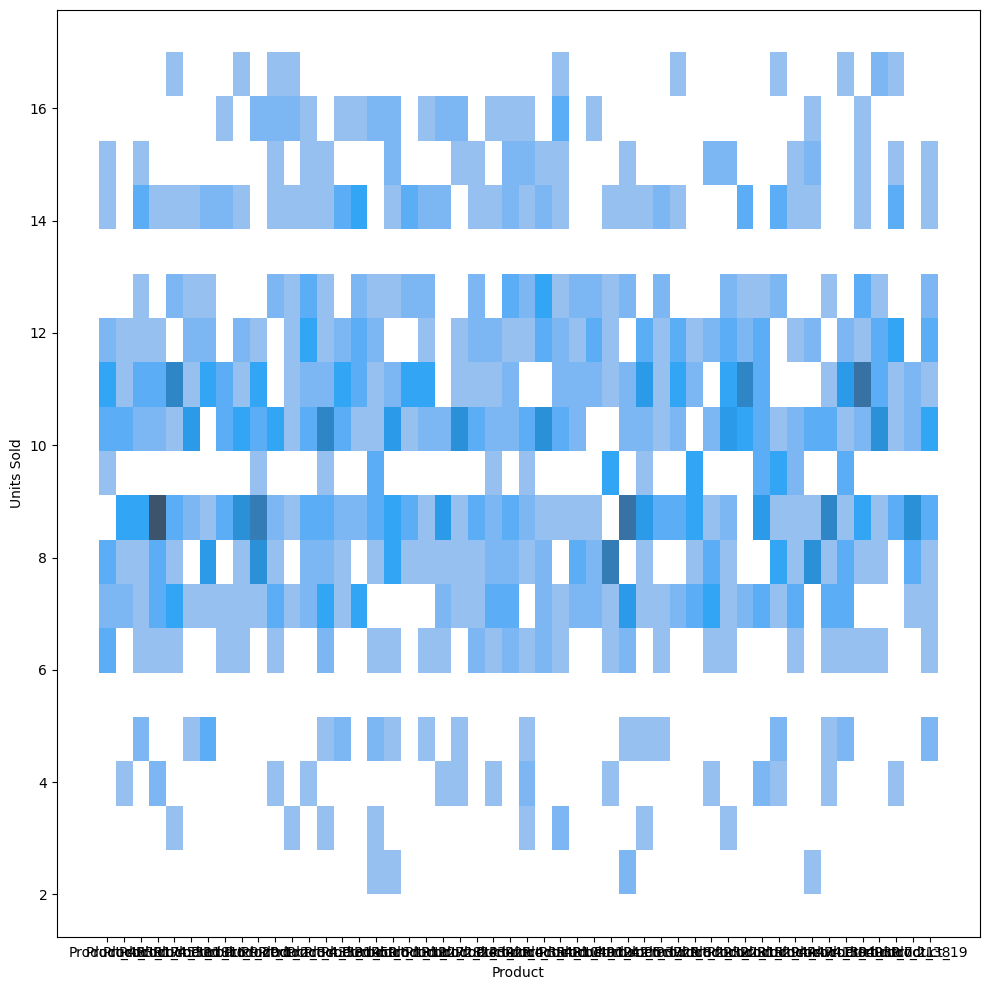

In [31]:
plt.figure(figsize=(10, 10))
sns.histplot(data=sales_df, x='Product', y='Units Sold')
plt.tight_layout()
plt.show()

Since, there are a lot of product categories, it is difficult to make observations based on products as the plotted graph is not easily readable

Plotting a histogram to see the correlation between Region and Price

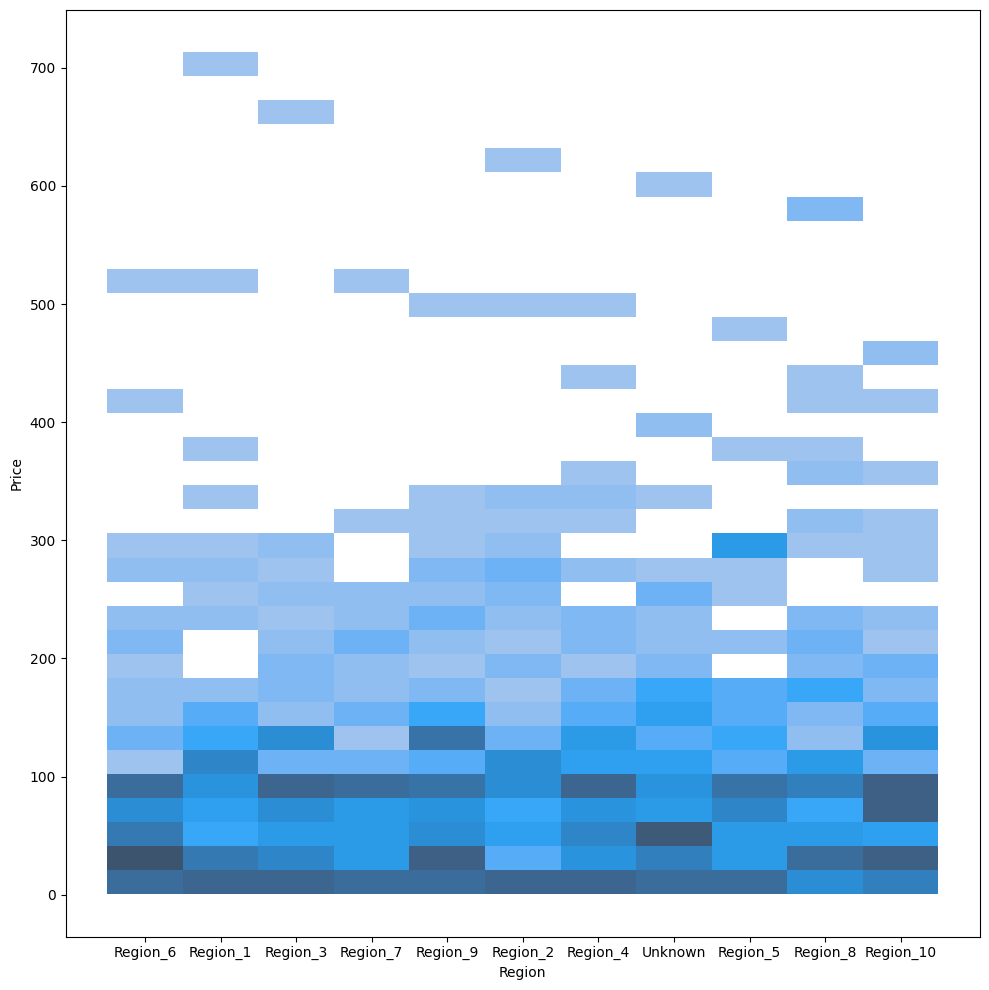

In [28]:
plt.figure(figsize=(10, 10))
sns.histplot(data=sales_df, x='Region', y='Price')
plt.tight_layout()
plt.show()

The above graph shows that in all regions orders which have the price 100 or less is occuring at a higher frequency than orders with price above 100

Plotting a histogram to see the correlation between Region and Product

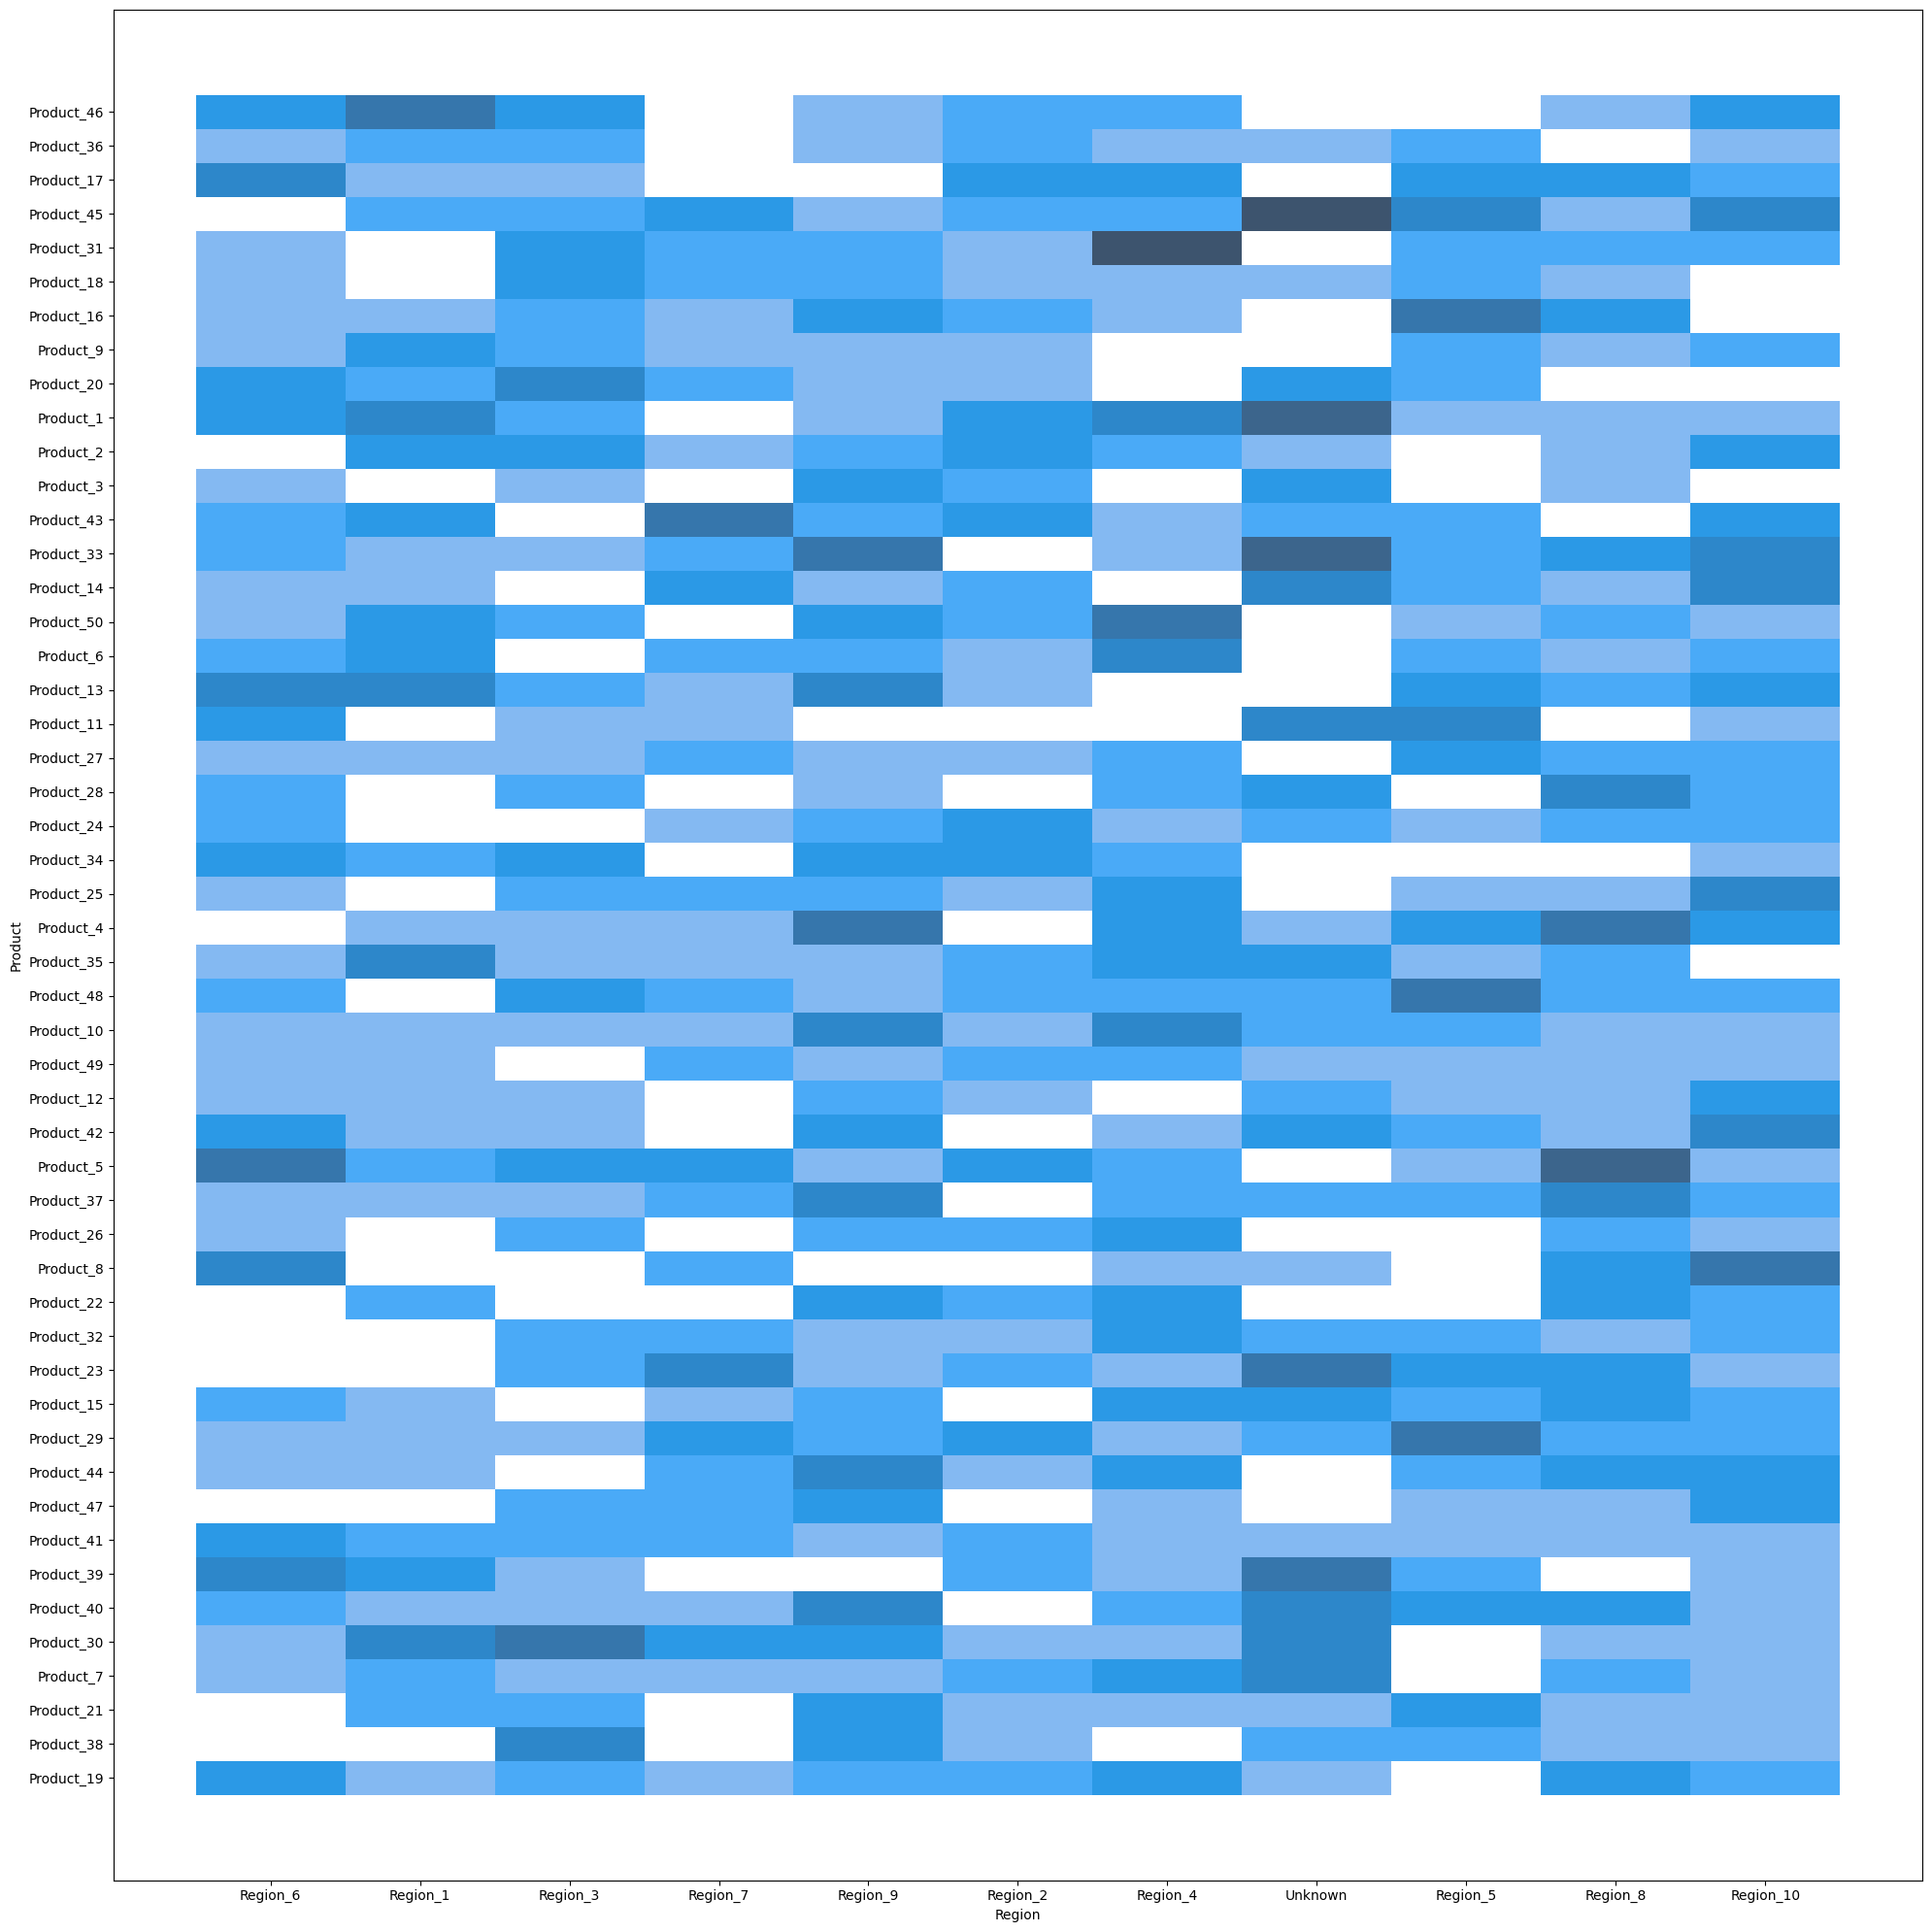

In [33]:
plt.figure(figsize=(20, 20))
sns.histplot(data=sales_df, x='Region', y='Product')
plt.tight_layout()
plt.show()

The above graph shows a lot of observations:-
1. Product_45 is very popular in Region_4 but its also popular in almost all other regions except Region_1 and the Unknown region
2. A lot of other products are also doing well in Region_4 and Region_9
3. Some products like product_19 and product_31 have a presence in almost all regions

Plotting a histogram taking Region as a parameter

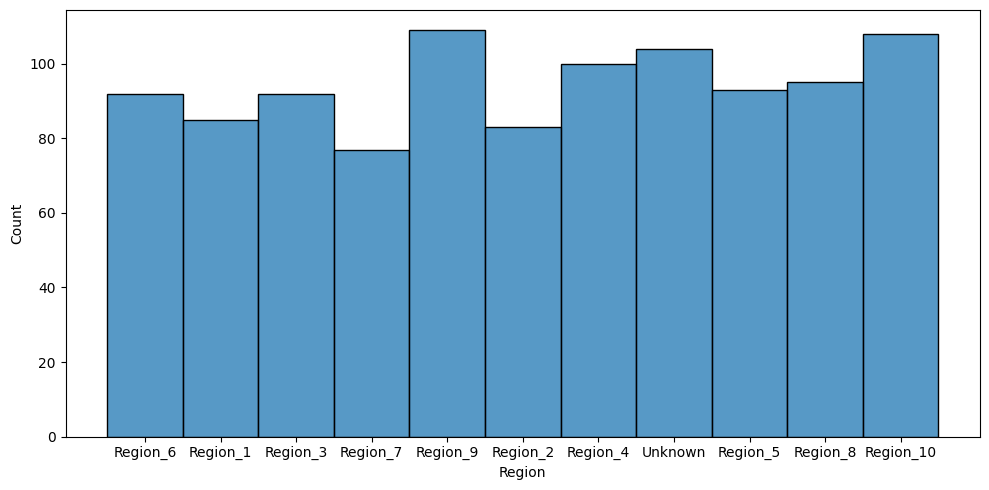

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(sales_df['Region'])
plt.tight_layout()
plt.show()

The above graph shows that Region_9 occurs more in the dataset

Based on the analysis conducted on the cleaned data, the following are my conclusion:

1. There is a very clear correlation between price and units sold that has been observed. Regardless of the number of units sold, the price is usually around 100

2. Regardless of region the number of units sold is usually between 6-12

3. Product popularity varies with region but Product_45 is very popular in Region_4 but its also popular in almost all other regions except Region_1 and the Unknown region





Recommendations for the business:

1. Since it seems like customers are okay with paying around 100 for every order, they should be incentivised to pay more. This can be additonal discount for each order above the price of 100 or the sales team can hand out gift cards to customers for every order above 100. This will lead to higher sales as the value of the average order will go up.

2. The sales team can do a case study of Product_45 as it seems to be the most popular product across regions. This will help the sales team understand what is working well this product and the knowledge can be used to sell other products more effectively

3. A lot of orders are coming in from Region_9, so if sales slows down in other regions then the sales team can focus on this region to boost their sales more

Data cleaning approach:

1. After importing the data, I went through the dataset by using info and describe functions.

2. Since, there are a lot of null values, I decided to fill them instead of deleting them using the drop function.

3. I filled in the null values in Product and Region column as 'Unknown'

4. I filled in the Price and Units Sold column by using the grouby and transform functions which allowed me to take the average price by product category

5. After filling the null values, I decided to check for outliers and deleted them. I did this for more accurate analysis of the data